# Ask Ubuntu Chenge Point Detection

### Create links pickle from the inteactions

In [ ]:
import pandas as pd
import time
import datetime
import sys
sys.path.append('../py')

AU = pd.read_csv('../DataSets/AskUbuntu/sx-askubuntu.txt', sep=' ',
                      header=None,names= ["source", "target","orig_timestamp"])
AU['timestamp'] = pd.to_datetime(AU['orig_timestamp'],unit='s')
AU['timestamp'] = AU['timestamp'].dt.date

AU.to_pickle('FramewokExec/AskUbuntu/AskUbuntuLinks.pickle')
AU.head()

# Test window size = 7 , slide = 7

In [2]:
#Load Object
import CPD
import datetime
SynG = CPD.CPD(WindowSize='Interval',debug=False)

HomeDirectory = 'FramewokExec/AskUbuntu/' 
Activation = {'Master':{"Generate":True,"Fit":True,"Conf":True,"ConfType":['KS'] ,"ConfusionMatrix":False},
              'Slave': {"Generate" : False,'Fit':False,'Compare':False,'ConfusionMatrix':False},
              'HyperParams': {'WindowMode': 'Interval','Slider': [7,7]},
              'CmModes': [('KSP-value',0.9)],
              #'TestingDates' : [0,0],
              'EventsFilter' : [],
              'TestingDates' : [datetime.datetime.strptime('01/01/2015',"%d/%m/%Y"),
                                datetime.datetime.strptime('31/12/2015',"%d/%m/%Y")],
              #'EventsFilter' : [('EventType','Regulation')],
              'plot_params' : {'winsize':30,'draw_window':True,'drawthreshold':False,'draweventvertical' : True,
                                'plot_reference': [],'pinsize': 60, 'gt_at_top' : True , 'legend' : 'lower right',
                              'PrintPlot' : True},
              'Directory':HomeDirectory,
              'Links' : 'AskUbuntu'
             }

## Create Network by Intervals

In [5]:
SynG.CPDbyActivation(Activation)

In [ ]:
Activation['Master'] = {"Generate":False,"Fit":False,"Conf":False,"ConfType":['KS'] ,"ConfusionMatrix":True}
CPResults = SynG.CPDbyActivation(Activation)

# Test window size = 30, Slide = 30

In [1]:
#Load Object
import CPD
import datetime
SynG = CPD.CPD(WindowSize='Interval',debug=False)

HomeDirectory = '../FramewokExec/AskUbuntu/' 
Activation = {'Master':{"Generate":True,"Fit":True,"Conf":True,"ConfType":['KS'] ,"ConfusionMatrix":False},
              'Slave': {"Generate" : False,'Fit':False,'Compare':False,'ConfusionMatrix':False},
              'HyperParams': {'WindowMode': 'Interval','Slider': [30,30]},
              'CmModes': [('KSP-value',0.5)],
              #'TestingDates' : [0,0],
              'EventsFilter' : [],
              'TestingDates' : [datetime.datetime.strptime('01/01/2015',"%d/%m/%Y"),
                                datetime.datetime.strptime('31/12/2015',"%d/%m/%Y")],
              #'EventsFilter' : [('EventType','Regulation')],
              'plot_params' : {'winsize':30,'draw_window':False,'drawthreshold':False,'draweventvertical' : True,
                                'plot_reference': [],'pinsize': 60, 'gt_at_top' : True , 'legend' : 'upper center',
                              'PrintPlot' : True,'y_scale': 'Confidence' , 'Align_GT_to_Win':True , 
                              'show_tn' : False, 'annotate':False},
              'Directory':HomeDirectory,
              'Links' : 'AskUbuntu'
             }
# Available values for 'y_scale': 'NumberOfNodes' , 'NumnerOfInteractions' , 'Confidence'

## Create the network

In [2]:
SynG.CPDbyActivation(Activation)

## CPD Test

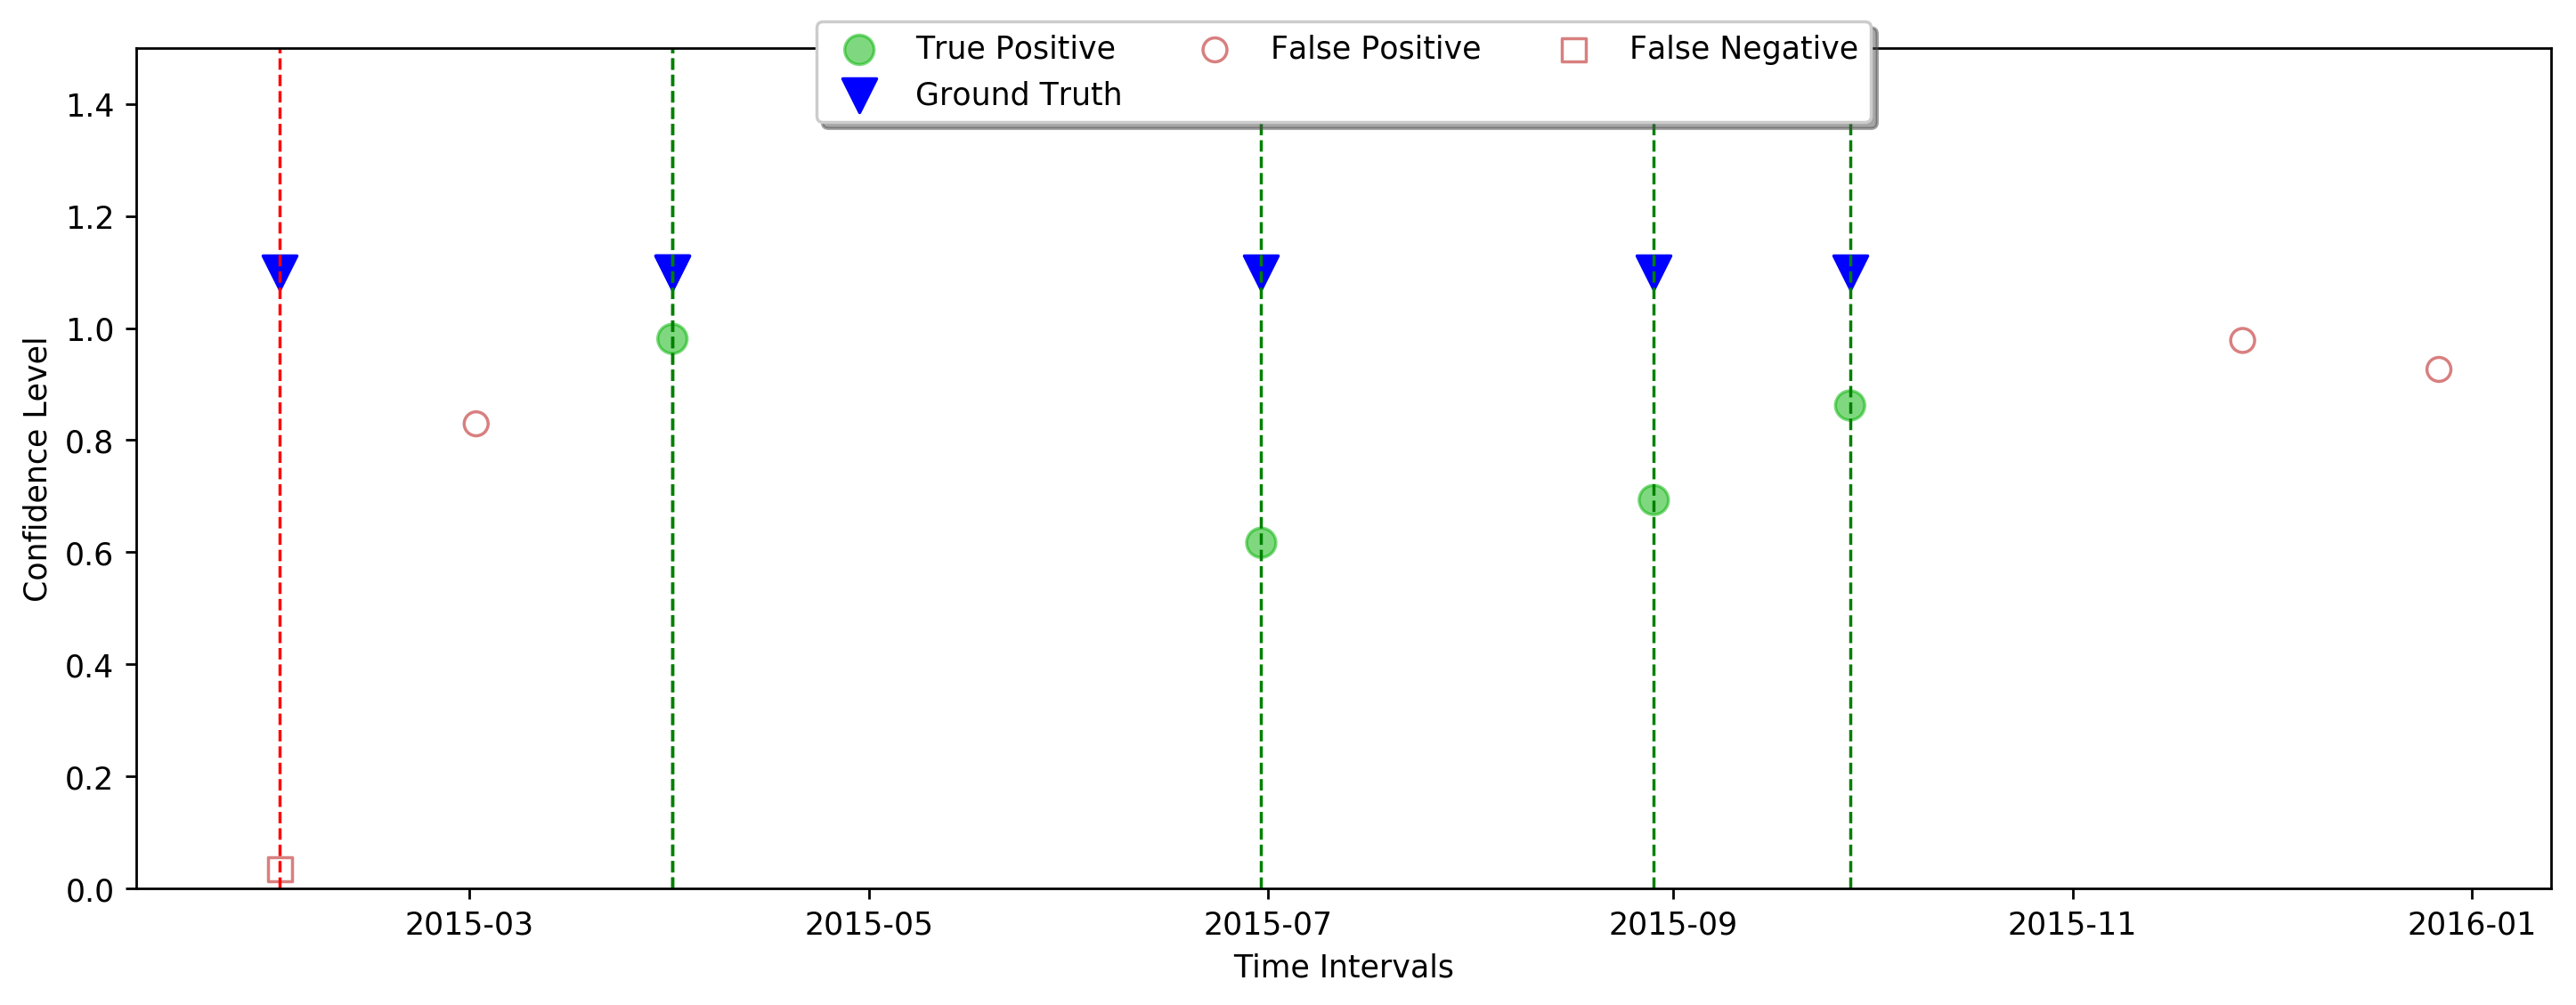

True Positive: 4
False Negative: 1
Recall: 0.8
Precision: 0.571428571429


In [4]:
Activation['Master'] = {"Generate":False,"Fit":True,'WeightedFit':True,"Conf":True,"ConfType":['KS'] ,"ConfusionMatrix":True}
CPResults = SynG.CPDbyActivation(Activation)

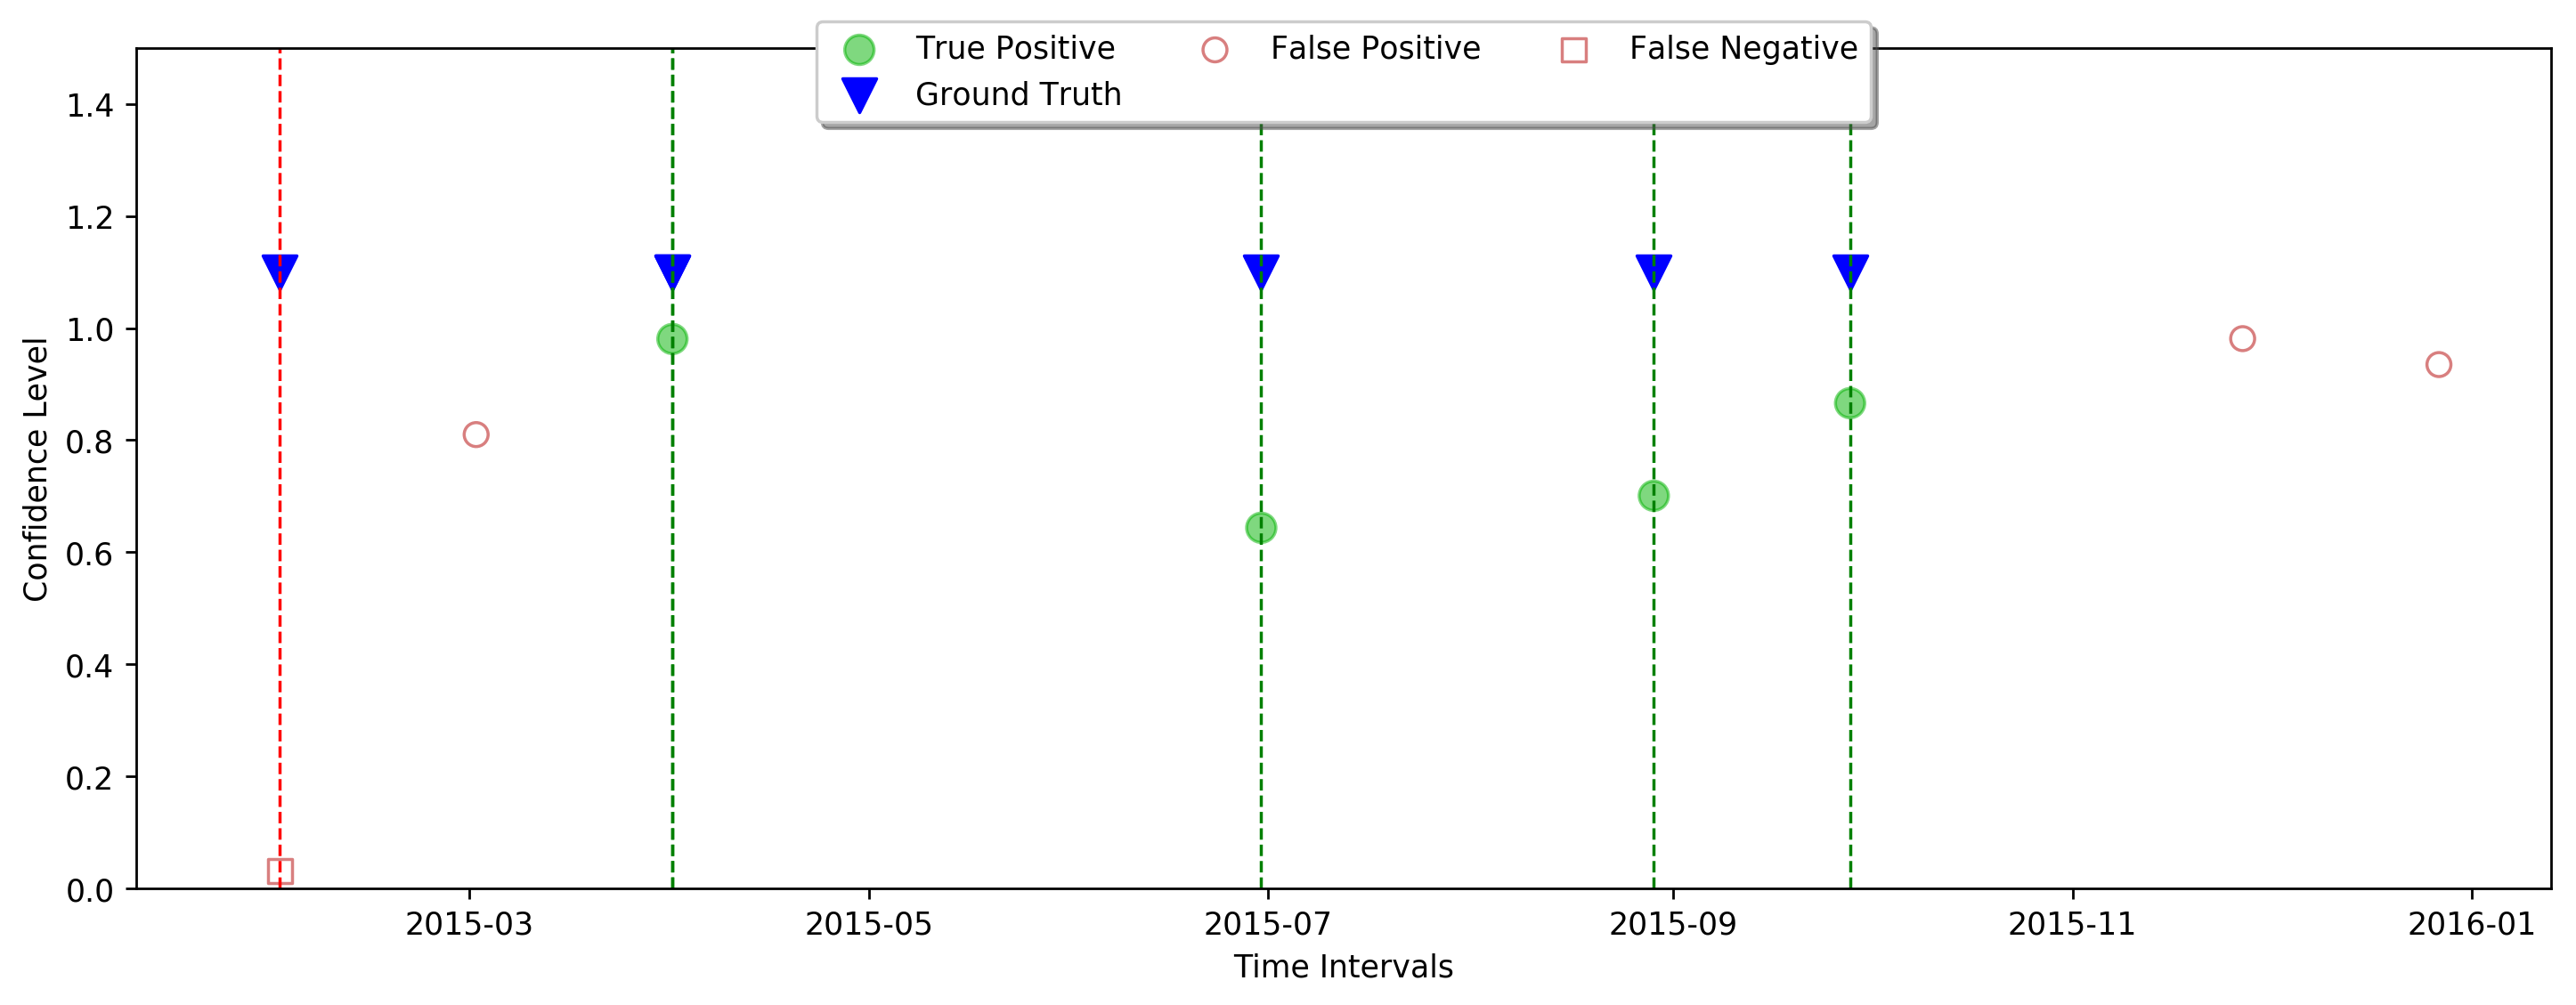

True Positive: 4
False Negative: 1
Recall: 0.8
Precision: 0.571428571429


In [5]:
Activation['Master'] = {"Generate":False,"Fit":True,'WeightedFit':False,"Conf":True,"ConfType":['KS'] ,"ConfusionMatrix":True}
CPResults = SynG.CPDbyActivation(Activation)